### 설정

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔금한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### 2.3.2 데이터 다운로드

In [2]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
  os.makedirs(housing_path, exist_ok=True)
  tgz_path = os.path.join(housing_path, "housing.tgz")
  urllib.request.urlretrieve(housing_url, tgz_path)
  housing_tgz = tarfile.open(tgz_path)
  housing_tgz.extractall(path=housing_path)
  housing_tgz.close()
  
  # 현재 작업공간에 datasets/housing 디렉토리를 만들고 그 안에 내려받은 파일(.tgz)과 + 압축 풀은 파일(.csv) 를 생성

In [3]:
fetch_housing_data()

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

# csv 파일을 다룰때 가장 대표적으로 사용하는 라이브러리 -> pandas
# 모든 데이터를 담은 판다스의 데이터프레임 객체를 반환

### 2.3.3 데이터 구조 훑어보기

In [5]:
housing = load_housing_data()
housing.head()

# DataFrame의 head()메서드로 첫 다섯 행 확인해 보기 -> 이떄 행 하나당 샘플 하나 !!

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info()

# 데이터에 대한 간략한 설명, 전체 행 수, 각 특성의 데이터 타입과 널이 아닌 값의 개수 확인 등 ~
# 데이터 내의 각 특성들에 대해 대략적인 파악이 가능 ~
# 예를 들어 total_bedrooms 특성은 20433개만 널 값이 아님, 즉 207개의의 구역은 이 특성을 갖지 않음 <- 이런게 이후에 처리하는 과정에서 문제가 될수 있음, 이런식으로 대략적인 파악~

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing["ocean_proximity"].value_counts()

# 유일하게 숫자형이 아니었던 ocean_proximity 특성 ! -> 범주형이지 않을까 라고 예측해 볼 수 있음
# .value_counts() 로 한 번 확인해 보기 ~, 각 카테고리마다 얼마나 많은 구역이 있는지 파악 가능

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

# .describe()메서드는 숫자형 특성의 요약 정보를 보여준다
# 25/50/75 % 행은 전체 관측값에서 주어진 백분율이 속하는 하위 부분의 값을 나타낸다
# 예를 들어 25% 구역은 housing_median_age 가 18보다 작고, 50%는 29보다 작음을 의미

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


그림 저장: attribute_histogram_plots


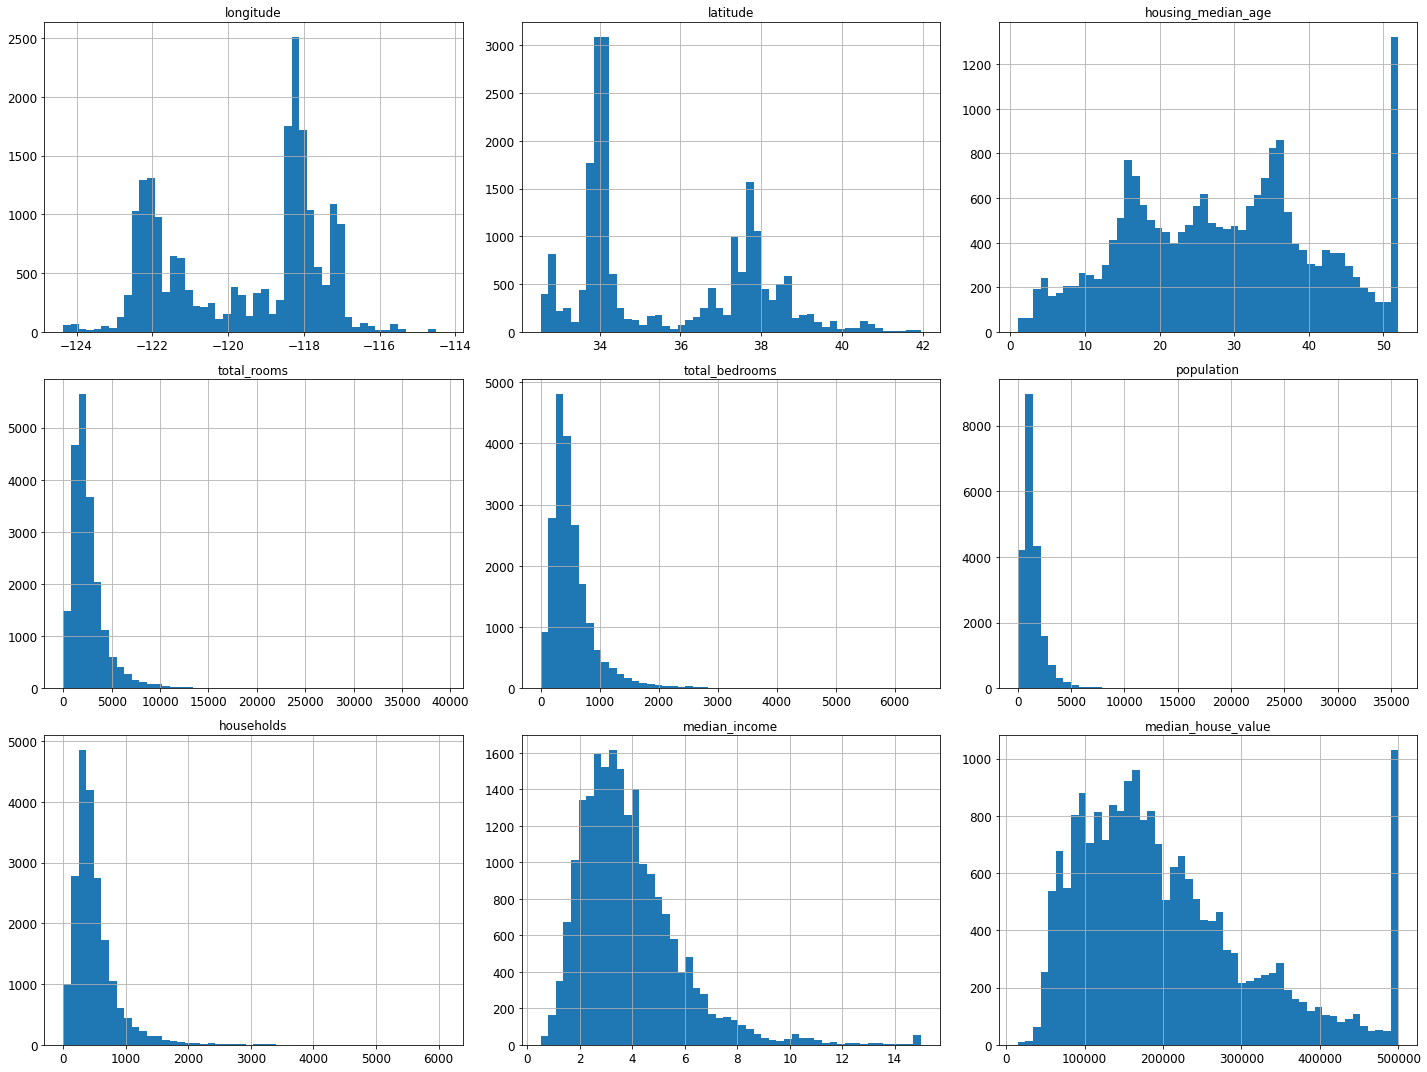

In [9]:
%matplotlib inline 
# 맷플롯립이 주피터 자체의 백엔드(그래프를 그리는데 필요한 컴퓨터의 그래픽 백엔드)를 사용하도록 하는 명령어
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig('attribute_histogram_plots')
# bins는 막대기의 갯수 , figsize는 캔버스의 크기를 의미 
plt.show()

In [10]:
# 이후에도 실행 결과가 같도록
np.random.seed(42)

### 2.3.4 테스트 세트 만들기
무작위로 어떤 샘플을 선택해서 데이터셋의 20% 정도를 떼어 놓는다.

In [11]:
import numpy as np

# 아래 함수는 예시로 만든 것, 실전에서는 사이킷런의 train_test_split()을 써라
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))  # permutation() : 입력받은 숫자까지의 수를 섞어준다
    # np.random.permutaion(int ~)은 인자로 받은 숫자까지로 이루어진 숫자들이 무작위로 섞인 배열을 만든다 
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [12]:
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)
len(test_set)

4128

In [13]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

# loc / iloc 는 해당 인덱스에 해당하는 행의 데이터를 가져온다 , iloc는 음수도 가능하다는 차이정도 그 외에는 같음

In [14]:
housing_with_id = housing.reset_index()
# index 열이 추가된 데이터프레임이 반환됨
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2 ,"index")

In [15]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
# 대부분의 경우 사이킷런의 train_test_split 을 사용한다.

In [17]:
test_set.head()
# 출력 결과를 보면 인덱스가 무작위 순서로 섞인 것을 확인할 수 있다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


<AxesSubplot:>

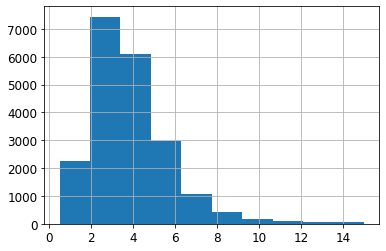

In [18]:
housing["median_income"].hist()

그래프가 왼쪽으로 편향되어 있다.  
범주형 특성으로 바꿔보자

In [19]:
# median_income 특성을 범주형 특성으로 바꾸기
# 소득 카테고리 특성 만들기
housing["income_cat"] = pd.cut(housing["median_income"],
                                bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                                labels = [1, 2, 3, 4, 5])
# pd.cut(데이터, 구간의 갯수, label명) 은 데이터를 동일한 길이로 나눈다

In [20]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

<AxesSubplot:>

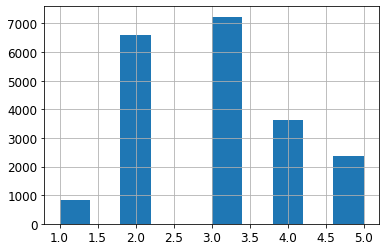

In [21]:
housing["income_cat"].hist()

그래프가 이전보다는 고르게 분포된 것을 알 수 있다.  

이제 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었다.  
StratifiedShuffleSplit은 StratifiedKFold의 계층 샘플링과 ShuffleSplit의 랜덤 샘플링을 합친 것  
Stratified가 붙으면 계층형 분할기라고 보면 된다.  
범주형 특성을 고르게 분할해주는 기능을 갖고 있다 !  

In [22]:
# 이제 소득 카테고리를 기반으로 계층 샘플링을 할 준비가 되었다.
# StratifiedShuffleSplit은 StratifiedKFold의 계층 샘플링과 ShuffleSplit의 랜덤 샘플링을 합친 것
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]):  # 범주형 특성 중 고르게 나눌 대상을 인자로 넣어줌
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [23]:
# 테스트 세트에서 소득 카테고리의 비율 살펴보기
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [24]:
housing["income_cat"].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

계층 샘플링을 사용해 만든 테스트 세트가 전체 데이터셋에 있는 소득 카테고리의 비율과 거의 같다 <- 잘 된 거 !  
테스트 세트를 만들었는데 일반화되지 않은? 데이터들로 이루어 졌다면 거기에 성능을 테스트해본 다는게 의미가 없지 ~!

In [25]:
st_train_set, st_test_set = train_test_split(housing, test_size = 0.2, random_state = 42, stratify = housing["income_cat"])

In [26]:
st_train_set["income_cat"].value_counts() / len(st_train_set)

3    0.350594
2    0.318859
4    0.176296
5    0.114402
1    0.039850
Name: income_cat, dtype: float64

In [27]:
# income_cat 특성을 삭제해서 데이터를 원래 상태로 되돌린다.
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis = 1, inplace = True)

# axis가 기본값이 0일 때는 행을 삭제 , 1일 때는 열을 삭제

In [28]:
# 훈련 세트를 손상시키지 않기 위해 복사본 만들기
housing = strat_train_set.copy()

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

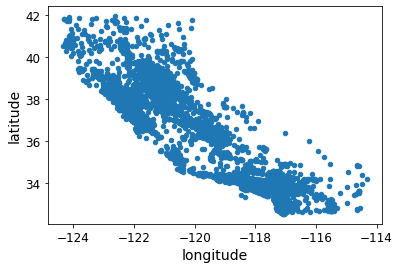

In [29]:
# 위도와 경도 정보를 알고 있으니 모든 구역을 삼점도로 만들어 데이터를 시각화 하기
housing.plot(kind = "scatter", x = "longitude", y = "latitude")  # housing 데이터프레임의 ! longitude와 latitude를 각각 x, y에 넣어준 것

# 그래프 그리는 다른 방법들
# housing.plot.scatter(x = ~, y= ~) 해줘도 됨
# plt.scatter(housing["longitude"], housing["latitude"])

### 위의 그래프는 캘리포니아 지역은 잘 나타내지만 어떤 특별한 패턴을 찾기는 힘듦
### alpha 옵션을 줘서 데이터 포인트가 밀집된 영역을 살펴본다

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

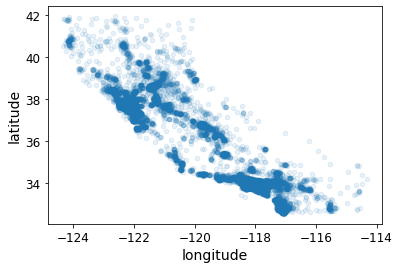

In [30]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.1)  # 투명함을 줘서 많이 겹쳐질수록 색이 진해지는 것 이용

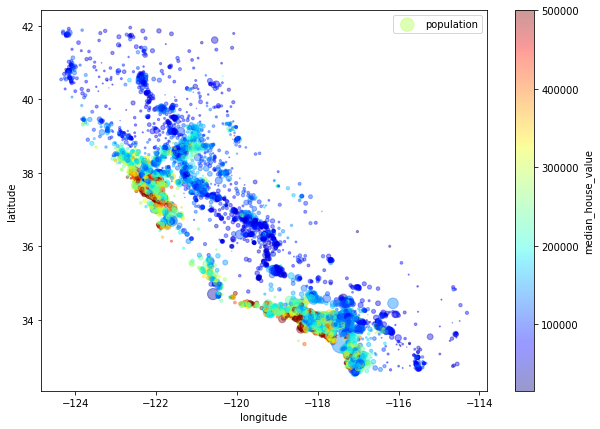

In [22]:
housing.plot(kind = "scatter", x = "longitude", y = "latitude", alpha = 0.4,
            s = housing["population"]/100, label = "population", figsize = (10, 7),
            c = "median_house_value", cmap = plt.get_cmap("jet"), colorbar = True,  # j컬러맵 : 값이 높은 곳을 빨갛게 , 값이 낮은 곳은 파랗게
            sharex = False
)
plt.legend()

# 매개변수 s : 원의 반지름으로 구역의 인구를 나타낸다
# 매개변수 c : 색상으로 가격을 나타낸다

### 데이터셋이 너무 크지 않기 때문에 모든 특성 간의 표준 상관계수를 corr()메서드를 이용해 쉽게 계산이 가능하다

In [23]:
corr_matrix = housing.corr()
# 중간 주택 가격과 다른 특성 사이의 상관관계 크기가 얼마나 되는지 살펴보자
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

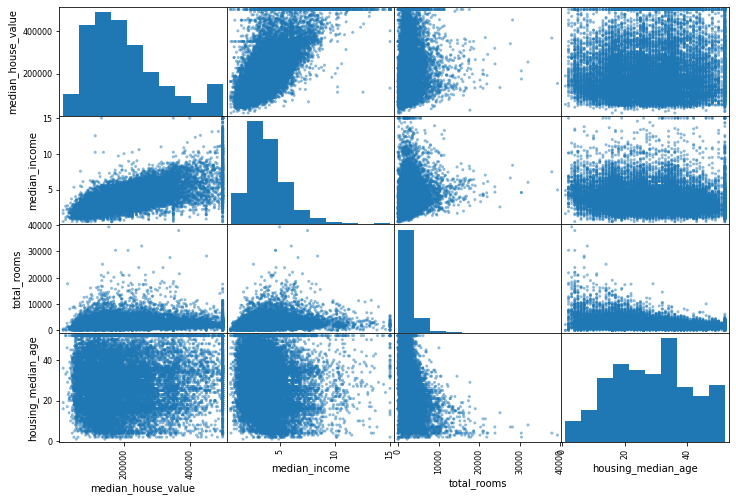

In [24]:
# 위의 corr( )메서드 말고 각 특성들 사이의 상관관계를 확인하는 다른 방법
# : 숫자형 특성 사이에 산점도를 그려주는 판다스의 scatter_matrix  함수 사용
# 특성이 11개나 되기 때문에 위에서 구했을 때  관련성이 높았던 것들을 살펴본다. 
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
                "housing_median_age"]
scatter_matrix(housing[attributes], figsize = (12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

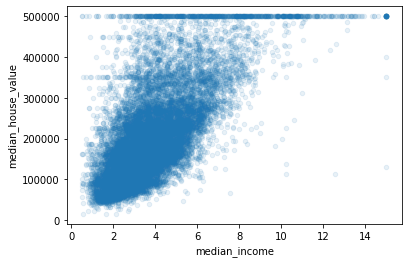

In [25]:
housing.plot(kind = "scatter", x = "median_income", y = "median_house_value",
            alpha = 0.1)

# 아래에 나타나는 그래프에서 5~ , 45~ 등에서 수평선 형태가 나타나는데 이후에 알고리즘이 데이터에서 이와 같은 이상한 형태를 학습하지 않도록 해당 구역은 제거하는 것이 좋다.

### 여러 특성의 조합 시도해 보기

In [26]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

In [27]:
# 새로운 특성 조합을 넣은 새로운 housing 데이터 !를 corr( ) 메서드로 각  특성 간의 표준 상관계수 구하기 
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### 이젠 머신러닝 알고리즘을 위한 데이터를 준비한다.

In [28]:
# 원래 훈련 세트로 복원
housing = strat_train_set.drop("median_house_value", axis = 1) # .drop() 이 axis=1 일 때 열을 삭제하는 건데 리턴 값이 있나봄 ! ......
housing_labels = strat_train_set["median_house_value"].copy()

In [29]:
housing.dropna(subset = ["total_bedrooms"])  # 옵션1
housing.drop("total_bedrooms", axis = 1)  # 옵션2
median = housing["total_bedrooms"].median()  # 옵션3
# 옵션3은 훈련세트에서 중간값을 계산하고 누락된 값을 이 값으로 채워넣음
housing["total_bedrooms"].fillna(median, inplace = True)

### 누락된 값을 다루는 사이킷런의 SimpleImputer

In [30]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "median")

# 누락된 값을 특성의 중간값으로 대체하는 경우

In [31]:
housing_num = housing.drop("ocean_proximity", axis = 1)
# 중간값이 수치형 특성에만 계산될 수 있기 떄문에 텍스트 특성인 ocean_proximy를 제외하고 데이터 복사본을 생성

In [32]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [33]:
# imputer 는 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장한다.
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [34]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [35]:
# 학습된 imputer 객체를 사용해 훈련 세트에서 누락된 값을 학습한 중간값으로 바꾸는 것이 가능
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns = housing_num.columns, 
                            index = housing_num.index)

### 텍스트와 범주형 특성 다루기

In [36]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


In [37]:
# OrdinalEncoder 클래스는 텍스트로 이루어진 카테고리를 숫자로 변환해 준다.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [38]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [39]:
# 범주의 값을 원-핫 벡터로 바꿔주는 OneHotEncoder 클래스 
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [40]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [41]:
# 여기에서도 인코더의 categories_ 인스턴스 변수를 사용해서 카테고리 리스트를 얻을 수 있다
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 2.5.3 나만의 변환기

In [42]:
# 조합 특성을 추가한 간단한 변혼기 예시
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                        bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [43]:
# 2.5.5 변환 파이프라인
# 숫자 특성을 처리하는 간단한 파이프라인
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [44]:
# 하나의 변환기로 각 열마다 변환을 적용해서 모든 열을 처리할 수 있게 해주는 ColumnTransformer
# 주택 가격 데이터에 전체 변화 적용해 보기
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

## 2.6 모델 선택과 훈련

In [45]:
# 지금까지 문제를 정의하고 데이터를 읽어 들이고 탐색해 봤다.
# 그리고 훈련 세트와 테스트 세트로 나누고 머신러닝 알고리즘에 주입할 데이터를 자동으로 정제하기 준비하기 위해 변환 파이프라인을 작성했다.
# 이제 머신러닝 모델!을 선택하고 훈련시는 것을 해본다.

In [46]:
# 2.6.1 훈련 세트에서 훈련하고 평가하기
# 선형회귀 모델 훈련해 보기
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# 지도학습 알고리즘은 라벨을 같이 인자로 넣어준다
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [47]:
# 훈련 세트에 있는 몇 개 샘플에 적용해 보자
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("예측:", lin_reg.predict(some_data_prepared))

예측: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [48]:
print("레이블:", list(some_labels))

레이블: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [49]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

# 성능이 만족스럽지 않음 ..
# 더 강력한 모델로 훈련시켜 보자 !

68628.19819848922

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

# 오차가 0이 나온다 ? -> 모델이 데이터에 너무 심하게 과대적합! 된 경우
# 이런 상황을 막기 위해 교차 검증 방법을 적용한다 !

0.0

In [52]:
# 2.6.2 교차 검증을 사용한 평가
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 10)
tree_rmse_scores = np.sqrt(-scores)

In [53]:
def display_scores(scores):
    print("점수:", scores)
    print("평균:", scores.mean())
    print("표준편차", scores.std())

display_scores(tree_rmse_scores)

점수: [69728.49053589 66140.98087977 70899.31866522 69679.24761762
 71100.1369653  74032.20491971 71301.86828205 69704.5557955
 76986.04009978 70735.19966922]
평균: 71030.80434300464
표준편차 2717.5030297006165


In [54]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균: 69052.46136345083
표준편차 2731.6740017983498


In [55]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18780.394757013753

In [56]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수: [49783.73695313 47963.72639208 49766.45317496 51992.17193141
 49607.6918568  53625.23800939 48769.04474505 48186.94706425
 53045.66700567 50249.86461035]
평균: 50299.05417430861
표준편차 1864.3853402199131


In [57]:
# 만족할 만한 하이퍼파라미터 조합을 찾을 때까지 수동으로 조정하는 것은 무리이기 때문에 이를 쉽게 해주는 사이킷런의 GridSearchCV !
# 탐색하고자 하는 파이퍼파라미터와 시도해볼 값을 지정하기만 하면 된다. 그러면 가능한 모든 조합에 대해 교차 검증을 사용해 평가한다. 
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                            scoring = 'neg_mean_squared_error',
                            return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [58]:
# best_params_ 변수에 자동으로 최적의 파라미터가 저장된다.
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [59]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30)

In [60]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63856.65159577511 {'max_features': 2, 'n_estimators': 3}
55562.86794658862 {'max_features': 2, 'n_estimators': 10}
53097.720034588485 {'max_features': 2, 'n_estimators': 30}
60870.87252015547 {'max_features': 4, 'n_estimators': 3}
53158.18181857779 {'max_features': 4, 'n_estimators': 10}
50422.114863147326 {'max_features': 4, 'n_estimators': 30}
59156.26137528539 {'max_features': 6, 'n_estimators': 3}
51918.39703471415 {'max_features': 6, 'n_estimators': 10}
50213.141230087465 {'max_features': 6, 'n_estimators': 30}
58394.90539828668 {'max_features': 8, 'n_estimators': 3}
52098.29738607815 {'max_features': 8, 'n_estimators': 10}
49707.75480649076 {'max_features': 8, 'n_estimators': 30}
62352.2236092207 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54798.59093228914 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59946.62541461238 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52163.745231149325 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [61]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances
# 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려준다.

array([7.11166501e-02, 6.10991663e-02, 4.23720831e-02, 1.53668910e-02,
       1.55047656e-02, 1.48215876e-02, 1.45881215e-02, 3.92631100e-01,
       3.66149904e-02, 1.08585591e-01, 5.99257960e-02, 4.84977772e-03,
       1.57506932e-01, 5.26179624e-05, 1.89985019e-03, 3.06407925e-03])

In [62]:
extra_attribs = ["rooms_per_household", "pop_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse = True)

[(0.39263110016817954, 'median_income'),
 (0.15750693228374604, 'INLAND'),
 (0.10858559082999251, 'pop_per_household'),
 (0.07111665014118516, 'longitude'),
 (0.06109916633747748, 'latitude'),
 (0.05992579598145123, 'bedrooms_per_room'),
 (0.042372083067883856, 'housing_median_age'),
 (0.03661499035168854, 'rooms_per_household'),
 (0.015504765630480212, 'total_bedrooms'),
 (0.015366890956432537, 'total_rooms'),
 (0.01482158762003948, 'population'),
 (0.014588121522131, 'households'),
 (0.004849777715015999, '<1H OCEAN'),
 (0.0030640792457938696, 'NEAR OCEAN'),
 (0.0018998501860859785, 'NEAR BAY'),
 (5.2617962416564636e-05, 'ISLAND')]

In [63]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

final_rmse

47812.34518950236

In [64]:
# 일반화 오차의 신뢰구간 계산
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc = squared_errors.mean(),
                        scale = stats.sem(squared_errors)))


array([45843.0785665 , 49703.65029438])